Importing the Dependencies

In [ ]:
# loading the dataset to pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Machine Learning data/loan_prediction3.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Display Top 5 Rows of The Dataset

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2. Check Last 5 Rows of The Dataset

In [ ]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [ ]:
data.shape

(614, 13)

In [ ]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 614
Number of Columns 13


4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


5. Check Null Values In The Dataset

In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Checking percentage of missing values in each collunm
data.isnull().sum()*100 / len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

6. Handling The missing Values

In [ ]:
data = data.drop('Loan_ID',axis=1)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#These are the colums with less than 5% missing values
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [ ]:
#droping the colums with missing values less than 5%
data = data.dropna(subset=columns)

In [ ]:
#Check if colunms were successfuly dropped
data.isnull().sum()*100 / len(data)

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
#Checking the most frequent value in the Self_Employed colunm
data['Self_Employed'].mode()[0]

'No'

In [ ]:
#Filling the Self_Employed colunm with the most frequent value
data['Self_Employed'] =data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
#Checking the most frequent value in the Credit_History colunm
data['Credit_History'].mode()[0]

1.0

In [ ]:
#Filling the Credit_History colunm with the most frequent value
data['Credit_History'] =data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [ ]:
#Check if colunms have been successfuly filled
data.isnull().sum()*100 / len(data)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

7. Handling Categorical Columns

In [ ]:
# Viewing a random sample of the data
data.sample(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
283,Female,No,0,Graduate,No,1811,1666.0,54.0,360.0,1.0,Urban,Y
598,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
480,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
362,Male,Yes,0,Graduate,No,4750,2333.0,130.0,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
272,Male,No,0,Graduate,No,2833,1857.0,126.0,360.0,1.0,Rural,Y
415,Female,No,0,Graduate,No,2995,0.0,60.0,360.0,1.0,Urban,Y
596,Male,Yes,2,Not Graduate,Yes,6383,1000.0,187.0,360.0,1.0,Rural,N
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
405,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y


There are many categorical colunms in the data. They have to be replaced

In [ ]:
# Dependent column values
data['Dependents'].value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [ ]:
# Checking the values in the Dependants Colunm
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
# replacing the value of 3+ to 4
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [ ]:
# Checking the values in the Dependants Colunm
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [ ]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
# convert categorical columns to numerical values
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [ ]:
# checking if the categorical columns have been converted into numerical values
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


8. Data Visualization

In [ ]:
# Import the Seaborn data visualization library and alias it as sns
import seaborn as sns

<Axes: xlabel='Education', ylabel='count'>

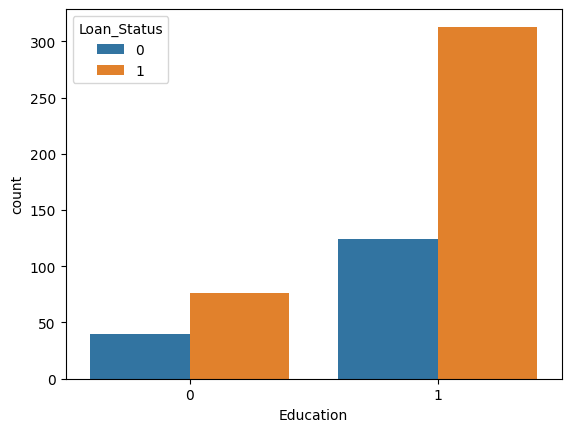

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=data)

<Axes: xlabel='Married', ylabel='count'>

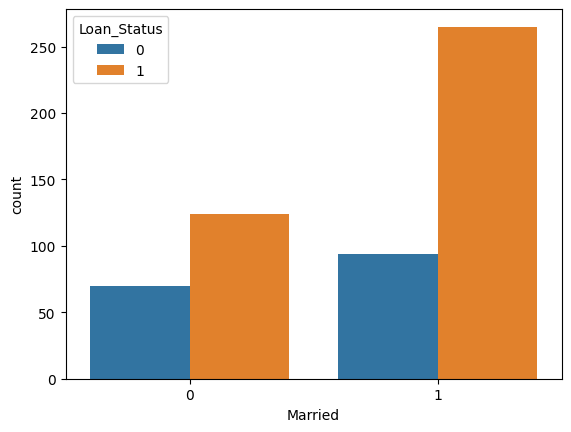

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=data)

9. Store Feature Matrix In X And Response (Target) In Vector y

In [ ]:
# Forming the X and Y values
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [ ]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int64


10. Feature Scaling

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [ ]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


11. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [ ]:
model_df

{}

12. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


13. SVC

In [ ]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


14. Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.7387387387387387
DecisionTreeClassifier() Avg cross val score is 0.7179852579852579


15. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.7657657657657657
RandomForestClassifier() Avg cross val score is 0.783013923013923


16. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7722031122031121


17. Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

18. Logistic Regression

In [ ]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [ ]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [ ]:
rs_log_reg.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_score_

0.8047829647829647

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

19. SVC

In [ ]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [ ]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [ ]:
rs_svc.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [ ]:
rs_svc.best_score_

0.8066011466011467

In [ ]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

19. Random Forest Classifier

In [ ]:
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [ ]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [ ]:
rs_rf.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [ ]:
rs_rf.best_score_

0.8066175266175266

In [ ]:
rs_rf.best_params_

{'n_estimators': 420,
 'min_samples_split': 50,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

LogisticRegression score Before Hyperparameter Tuning: 80.48
LogisticRegression score after Hyperparameter Tuning: 80.48 
    
------------------------------------------------------
SVC score Before Hyperparameter Tuning: 79.38
SVC score after Hyperparameter Tuning: 80.66
    
--------------------------------------------------------
RandomForestClassifier score Before Hyperparameter Tuning: 77.76 
RandomForestClassifier score after Hyperparameter Tuning: 80.66 

20. Save The Model

In [ ]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status'] 

In [ ]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [ ]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [ ]:
model = joblib.load('loan_status_predict')

In [ ]:
import pandas as pd
df = pd.DataFrame({
    'Gender':0,
    'Married':1,
    'Dependents':4,
    'Education':0,
    'Self_Employed':1,
    'ApplicantIncome':5849,
    'CoapplicantIncome':7420.0,
    'LoanAmount':245,
    'Loan_Amount_Term':280,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [ ]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,4,0,1,5849,7420.0,245,280,0,1


In [ ]:
result = model.predict(df)

In [ ]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


21. GUI